<a href="https://colab.research.google.com/github/OmkarBhikle/MainFlow_Internship_Tasks/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the CSV file
df = pd.read_csv('/content/disney_plus_titles.csv')

# Display the first few rows of the dataframe
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


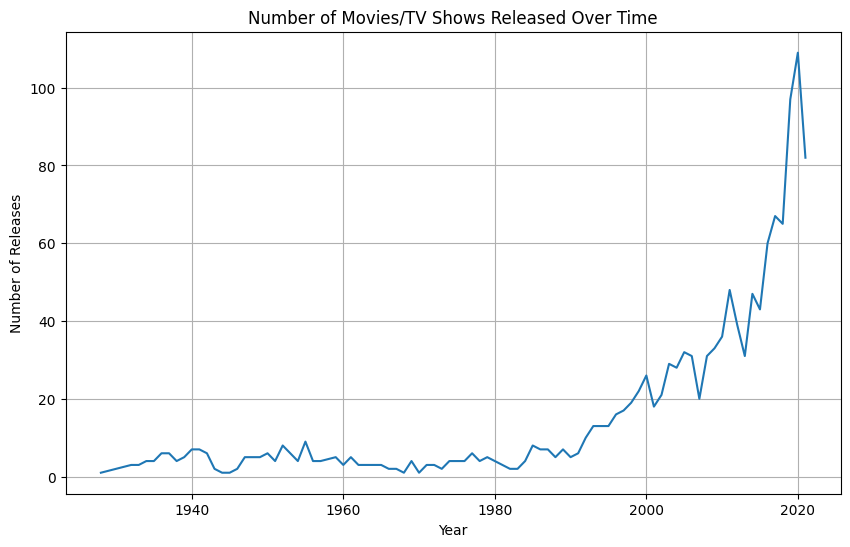

In [2]:
# Convert release_year to datetime
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

# Aggregate the number of movies/tv shows released each year
yearly_counts = df['release_year'].dt.year.value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Number of Movies/TV Shows Released Over Time')
plt.grid(True)
plt.show()


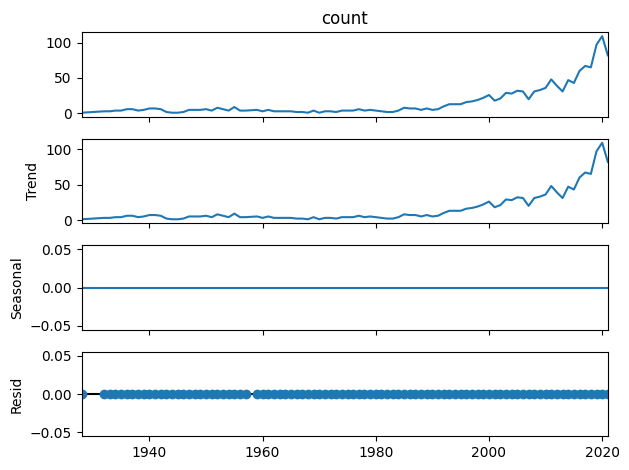

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(yearly_counts, model='additive', period=1)
result.plot()
plt.show()


From above time series analysis we can conclude that we can an uptrend and the entertainment industry of disney is on a growing path.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


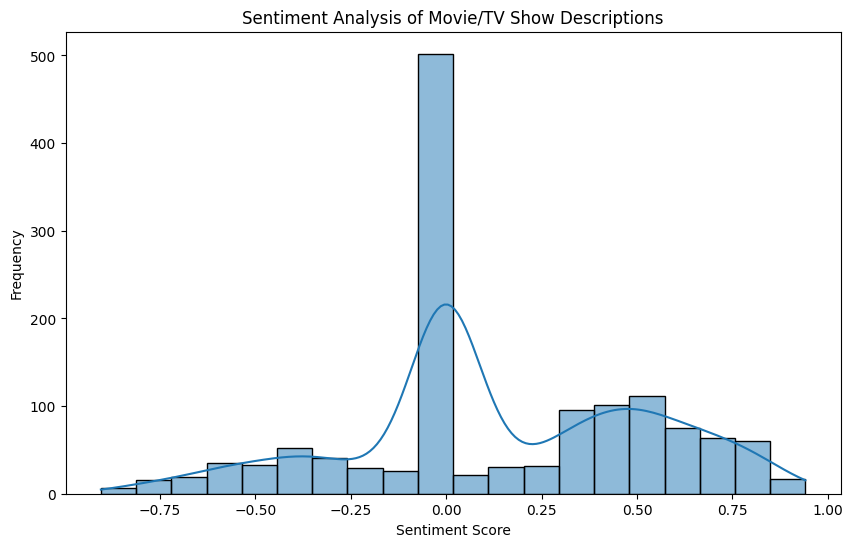

In [4]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment'] = df['description'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Visualize the sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Movie/TV Show Descriptions')
plt.show()


Since the above histogram is looking skewed in the between we can say that the sentiment here is mixed and very little bit towards the positive side.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


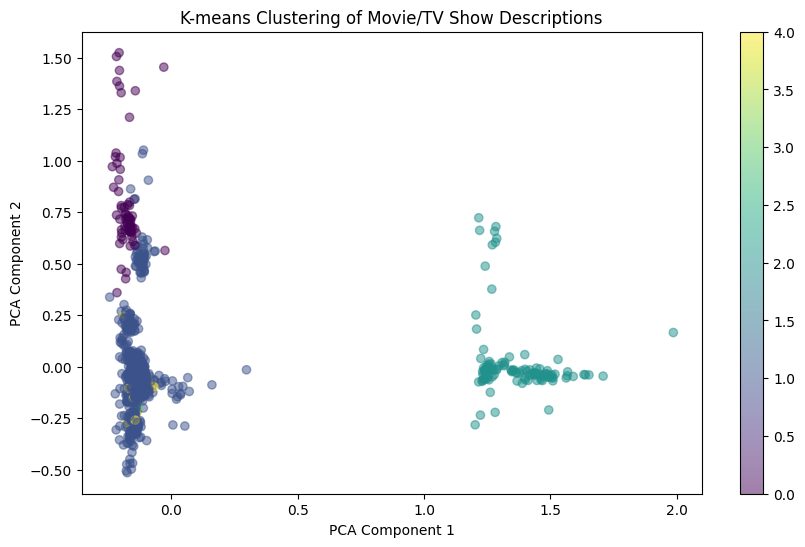

In [5]:
# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['description'])

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Visualize clusters with PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of Movie/TV Show Descriptions')
plt.colorbar()
plt.show()
